# Accéléromètre Piézoélectrique

Selon l'exercice 4.20

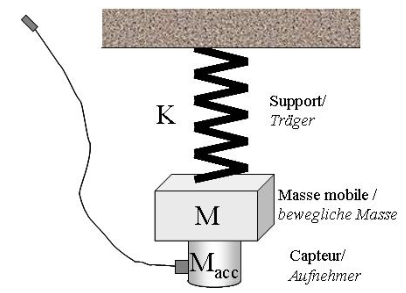{width=50%}

Un accéléromètre piézoélectrique (voir schéma
de principe) est utilisé pour détecter les
oscillations d’une masse M suspendue à un
ressort de constante élastique K.

On connaît :

In [6]:
vK=100 # [N/m]

Le cristal a les propriétés suivantes



In [7]:
vD=3 # diamètre en [mm]
vH=1 # hauteur en [mm]
vE=8e12 # Module d'élasticité [N/m^2]
vBeta = 2.26e-12 # [C/N]
vEpsilon0 = 8.85e-12 # [A s / V m]
vEpsilon_r = 4.5

Les connecteurs du capteur on une capacité en parallèle avec le cristal

In [8]:
vCstray=2 # pF

L'accéléromètre mesure une accélération subie par la masse sismique $M_s$ qui vaut :

In [9]:
vMs=1 # poids de la masse sismique du capteur [g]

### Q1 Calcul de la sensibilité de l'accéléromètre
- Quelle est la sensibilité du capteur S en $[V/(m/s^2)]$ en prenant en compte la capacité parasite $C_{stray}$ ?

On cherche la tension qui apparaît sur la sortie lorsqu'on applique une accélération de $1[m/s^2]$

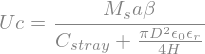

In [29]:
# Import du module pour calcul litteral
import sympy as sp
sp.init_printing()
def deq(name, value):
    return sp.Eq(sp.Symbol(name),value)
    
# Declaration des variables litterales
Ms,a, beta,D,H,epsilon_0, epsilon_r = sp.symbols('M_s,a, beta,D,H,epsilon_0, epsilon_r')
Cstray=sp.symbols('C_stray')
E=sp.symbols('E')

# Equations
F = Ms * a         # Newton
Q = beta * F      # equation du piézo

# Calcul de la capacité du cristal
S=sp.pi *(D/2)**2 # surface du piézo
Cq =  S /H * epsilon_0 * epsilon_r # Capacité du piézo

Ctot=Cq + Cstray  # Capacité totale
Uc = Q / Ctot     # Relation tension-charge de la capacité
deq('Uc',Uc) # Expression de U

In [30]:
# Valeurs numériques de l'exercice
valeurs={a:1,Ms:vMs*1e-3,beta:vBeta, Cstray:vCstray*1e-12, D:vD*1e-3, H:vH*1e-3, epsilon_0:vEpsilon0, epsilon_r:vEpsilon_r, E:vE}

In [31]:
# Valeur numérique pour la tension
# On a posé a=1, si bien que ceci correspond à la *sensibilité*
vS=Uc.subs(valeurs).evalf()
print("la sensibilité est de ",vS,"[V/(m/s^2)]")

la sensibilité est de  0.000990573623938871 [V/(m/s^2)]


In [32]:
deq("C_q",Cq.subs(valeurs).evalf())

In [34]:
print("Cq vaut {:.2f} [pF]".format(Cq.subs(valeurs).evalf()*1e12))

Cq vaut 0.28 [pF]


### Q2 Fréquence propre du capteur

La fréquence propre est donnée par :

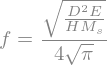

In [19]:
# Constante d'élasticité du piézo
Kf=E*S/H # [N/m]=[N/m2]*S[m2]/H[m]

# Relation entre masse, constante et pulsation propre
w=sp.sqrt(Kf/Ms)

# Fréquence propre
f=w/(2*sp.pi)
deq("f",f)

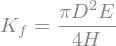

In [25]:
deq("K_f",Kf)

In [24]:
# Valeur numérique
print("La fréquence propre est de {:.2f} MHz".format(f.subs(valeurs).evalf()*1e-6))

La fréquence propre est de 1.20 MHz


## Q3 

Le capteur complet pèse 5g, on observe une fréquence propre de l'ensemble de f=10Hz
- Quelle est la masse M ?
- Quelle est l'oscillation sans le capteur ?
- Quelle est l'erreur de fréquence introduite ?

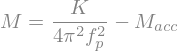

In [35]:
# On cherche la masse à partir de la relation entre K,M et la pulsation
# Déclaration des variables littérales
Mtot, fp, Macc, M, K = sp.symbols('M_tot, f_p, M_acc, M, K')

# Equations 
Eq1=sp.Eq(fp,sp.sqrt(K/Mtot)/(2*sp.pi)) # Pulsation propre
Eq2=sp.Eq(Mtot, M+Macc)                   # Masse totale

# Résolution des equations pour M, on élimine Mtot
sol=sp.solve([Eq1,Eq2],[M, Mtot])    
deq("M",sol[0][0])

In [36]:
# On a les valeurs numériques suivantes :
valeurs2={fp:10, Macc:5e-3, K:vK}

# Ce qui permet de calculer la valeur numérique
vM=sol[0][0].subs(valeurs).subs(valeurs2).evalf()
print("La masse pèse {:.1f} [g]".format(vM*1e3))

La masse pèse 20.3 [g]


In [38]:
# Calcul de la fréquence d'oscillation sans la masse du capteur
ff=(sp.sqrt(K/M)/(2*sp.pi)).subs(valeurs).subs(valeurs2).subs(M,vM)
print("la fréquence d'oscillation libre est {:.2f} [Hz]".format(ff.evalf()))

la fréquence d'oscillation libre est 11.16 [Hz]


In [15]:
# L'erreur de fréquence est donnée par
e=((10-ff)/ff).evalf()
print("L'erreur est de ",e*100,"[%]")

L'erreur est de  -10.4116128073391 [%]


## Q4

La tension est mesurée avec une résolution de 10uV.
- Quelle est l'accélération minimale qu'on peut mesurer
- Quelle est l'amplitude minimale en $[m]$ des vibrations que le capteur peut détecter


In [40]:
# a * Uc = 10 [uV]
vVmin=10e-6 # Tension minimale
va0 = (vVmin/vS) # accélération minimale
print("Le capteur a une sensibilité minimale de ",va0,"[m/s^2]")

Le capteur a une sensibilité minimale de  0.0100951607819280 [m/s^2]


In [41]:
# Calcul de l'amplitude minimale.

# Déclaration des variables
a0,t=sp.symbols('a0,t')

# on indique que w est positif pour simplifier la solution
w=sp.symbols('w', positive=True) 

# Equation de l'accélération et calcul de la position dans le temps
a=a0*sp.sin(w * t)
v=a.integrate(t)
x=v.integrate(t)
print("La position comme fonction du temps est x(t)=",x)

La position comme fonction du temps est x(t)= -a0*sin(t*w)/w**2


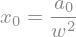

In [44]:
# L'amplitude du mouvement est donc
x0=-x/a*a0
deq("x_0",x0)

In [45]:
deq("x0",x0.subs(a0, va0).subs(w,10*2*sp.pi).evalf())

## Q5

Un autre capteur est 10x plus sensible mais la masse sismique est 10x plus grande

- Que devient la fréquence d'oscillation libre ?
- Quelle est l'amplitude des vibrations que le capteur peut détecter ?


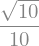

In [20]:
f2=sp.sqrt(Kf/(Ms*10))/(2*sp.pi)
f2/f

La fréquence propre est $\sqrt{10}$ fois plus petite

In [47]:
# S est 10 x plus grande, donc on peut mesurer a_min 10x plus petit
